<a href="https://colab.research.google.com/github/JavohirTF7/Midjourney_fine_tuning/blob/main/MidJourney_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kutubxonlarni o'rnatish

In [21]:
!pip install transformers diffusers accelerate -q

### Load the StableDiffusion Pipeline to use for Image Generation

In [22]:
from diffusers import StableDiffusionPipeline
import torch

In [23]:
model_path = 'prompthero/midjourney-v4-diffusion'

###  Fine-tuned Modelni yuklab olish

In [24]:
pipe = StableDiffusionPipeline.from_pretrained(model_path , torch_dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [25]:
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

device = "GPU 🔥" if torch.cuda.is_available() else "CPU 🥶"

### Prompt

In [36]:
base_prompt = "boy in New york city, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting"  #@param {type:"string"}

In [37]:
prompt = "mdjrny-v4 style " + base_prompt

In [38]:
prompt

'mdjrny-v4 style boy in New york city, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting'

In [39]:
result = pipe(
      prompt,
      width = 512,
      height = 512)

  0%|          | 0/50 [00:00<?, ?it/s]

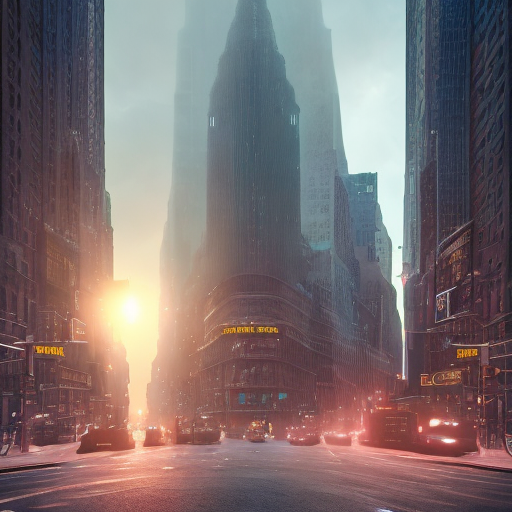

In [40]:
image = result.images[0]

image.save("sd_img.png")

image